In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

# Lista 6 (9 pkt.) Termin: 7.01.2021r.

## Zadanie 1 (1 pkt.)

Korzystając z funkcji:

In [2]:
time.time()

1610565249.3941343

zwracającej aktualny czas dokonaj pomiaru czasu wykonania potęgowania modulo. Tzn. weź np. wyrażenie:
$$2^{10^n}\mod3$$ i zmierz czas wykonania dla $n\in[1,9]$, dla każdego $n$ pomiar powtórz 10 razy i uśrednij wyniki, a następnie przedstaw je na wykresie, ze skalą logarytmiczną, przykład rysowania wykresu za pomocą plt (matplotlib.pyplot).

n= 1
sred= 4.38690185546875e-06
n= 2
sred= 6.651878356933593e-06
n= 3
sred= 9.942054748535157e-06
n= 4
sred= 1.1038780212402343e-05
n= 5
sred= 1.56402587890625e-05
n= 6
sred= 1.7976760864257814e-05
n= 7
sred= 1.8024444580078124e-05
n= 8
sred= 2.9611587524414063e-05
n= 9
sred= 2.5391578674316406e-05
n= 10
sred= 2.4509429931640624e-05


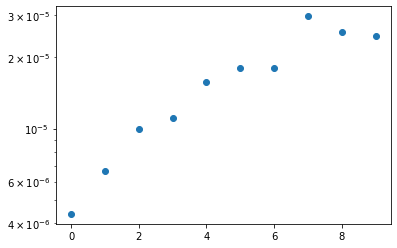

In [20]:
def pow_mod(x,n,m):
    p = 1
    while n:
        if n & 1:
            p = p * x % m
        n >>= 1
        x = x * x % m
    
    return p

tim = []
for n in range(1,11): 
    print("n=", n)
    t=[]
    for r in range(10):
        start = time.time()
        p = pow_mod(2, 10**n, 3 )
        t.append(time.time() - start)
#     print(t)
    sred = sum(t) / len(t)
    print("sred=", sred)
    tim.append(sred)
# print("tim=", tim)

plt.yscale('log')
plt.plot(tim,'o')

# y=[1.21593475e-06, 1.09672546e-06, 2.09808350e-06, 3.07559967e-06,
#        2.27212906e-05, 2.74515152e-04, 3.51948738e-03, 3.21102858e-02,
#        4.03478789e-01]
# plt.yscale('log')#ustawia logarytmiczną skalę na osi y
# plt.plot(y,'o')#rysuje dane z tablicy y za pomocą punktów

## Zadanie 2 (2 pkt.)

Zaimplemetuj szybkie potęgowanie. Napisz funkcję $\textit{pow_mod(x,n,m)}$, która oblicza:
$$x^n\mod m$$.

1. Niech $p=1$.
2. Iteruj po bitach reprezentujących $n$.
3. Przy każdej iteracji zastąp $p$ kwadratem, $p=p^2\%m$.
4. W iteracjach, w ktorych bit jest jednyką, domnóż $x$ do $p$, $p=p*x\%m$.
5. Na końcu $p$ będzie wynikiem $p=x^n\%m$

In [4]:
def pow_mod(x,n,m):
    p = 1
    while n:
        if n & 1:
            p = p * x % m
        n >>= 1
        x = x * x % m
    return p

In [5]:
print(pow_mod(7,3,2)==1)
print(pow_mod(2,1024,7)==2)
print(pow_mod(3,10**100,7)==4)
print(pow_mod(3**99,10**100,7)==1)

True
True
True
True


## Zadanie 3 (1 pkt.)

Dokonaj pomiaru czasu wykonania funkcji z zad. 2 za pomocą tego samego wyrażenia co w zadaniu 1. Narysuj na jednym wykresie czasy wykonania zależne od n dla metody standardowej (zad.1) i metody z zad.2.

## Zadanie 4 (1 pkt.)

Napisz funkcję znajdującą dla danej liczby $d$ i $n$ taką liczbe $e$, że:
$$d\cdot e=1\mod n$$
czyli inaczej mówiąc odwotność $d$ w ciele $Z_n$. Użyj Rozszerzonego Algorytmu Euklidesa.

In [6]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)
    
    

def inv(p,n):
    g, x, y = egcd(p, n)
    if g != 1:
        raise Exception('odwrotność modularna nie istnieje')
    else:
        return x % n

In [7]:
print(inv(5,7)==3)
print(inv(3,2)==1)
print(inv(5,7)==3)
print(inv(3,11)==4)

True
True
True
True


## Zadanie 5 (1 pkt.)

Zaimplementuj test Fermata, który dla danej liczby $p$ sprawdza za pomocą $k$ rund czy jest pierwsza i zwraca $True$ lub $False$.

Male twierdzenie Fermata mówi, że jeżeli $p$ jest liczbą pierwszą i $a$ nie jest podzielne przez $p$ to $a^{p-1}$ jest równe $1$ modulo $p$:

$$p\in\mathbb{P}\ \wedge\ p\nmid a\ \Longrightarrow\ a^{p-1}=1\mod p$$

zatem biorąc zaprzeczenie powyższej implikacji mamy:

$$a^{p-1}\neq1\mod p\ \Longrightarrow\ p\notin\mathbb{P}\ \vee\ p\mid a$$

Tzn. jeżeli weźmiemy dowolne $a$ mniejsze od $p$ (w ten sposób wykluczamy $p\mid a$) i równość $a^{p-1}=1\mod p$ nie zajdzie to wiemy, że $p$ jest na pewno liczbą pierwszą, natomiast jezeli $a^{p-1}=1\mod p$ zachodzi wtedy jest duże prawdopodobieństwo, że $p$ jest liczbą pierwszą aczkolwiek nie jest to pewne.

Należy zatem wybrać liczbę $a\in[2,p-2]$, sprawdzić czy zachodzi $a^{p-1}=1\mod p$, jeżeli nie zachodzi to $p$ jest złożone a jesli zachodzi należy wziąć inne $a$ i ponownie sprawdzić, parametr $k$ określa ile razy $a$ bierzemy. Jeżeli po $k$ powtórzeniach za każdym razem równość zachodzi, możemy przyjąć, że $p$ jest pierwsze.

In [8]:
def Fermat_test(p,k):
    for i in range(k):

        rnd = random.randint(1, p - 1)

        if (rnd ** (p - 1) % p != 1):
            return False

    return True

In [9]:
print(Fermat_test(71,10)==True)
print(Fermat_test(41,10)==True)
print(Fermat_test(62,10)==False)
print(Fermat_test(84,10)==False)

True
True
True
True


Zaimplementuj funkcję $\textit{gen_p(a,b)}$, która zwraca losową liczbę pierwszą z przedziału $a$ i $b$, tzn. losuje liczby z tego przedziału i sprawdza czy są pierwsze testem Fermata tak długo aż znajdzie liczbę pierwszą.

In [10]:
def gen_p(a,b):
    n = random.randint(a, b)
#     print("n1=", n)
    while (Fermat_test(n, 10)==False):
        n = random.randint(a, b)
#         print("n=", n)
    return n            
print(gen_p(100,200) )

n= 156
n= 116
n= 162
n= 158
n= 110
n= 120
n= 118
n= 172
n= 115
n= 191
191


## Zadanie 6 (2 pkt.)

Zaimplementuj generację kluczy w ramach algorytmu RSA, napisz funkcję $\textit{key_gen(p,q)}$, która dla podanych dużych liczb pierwszych $p$ i $q$ zwraca parę kluczy w postaci krotki $(n,e,d)$.

1. Obliczamy iloczyn $n=pq$
2. Następnie funkcję Eulera $\phi(n)=(q-1)(p-1)$
3. Klucz publiczny to para $(e,n)$ gdzie $e$ to liczba ze zbioru $\{1,2,..,\phi(n)-1\}$ taka, że $NWD(e,\phi(n))=1$, może być ona ustalona np. jako $e=2^{2^4}+1=65537$, w teście użyto właśnie tej liczby.
4. Klucz prywatny to para $(d,n)$, gdzie $d$ to liczba taka, że $de=1\ mod\ \phi(n)$, czyli $d$ jest odwrotnością $e$ w ciele $\mathbb{Z}_{\phi(n)}$.

In [11]:
def gcd(a, b): 
    while b != 0: 
        a, b = b, a % b 
    return a



def key_gen(p,q): 
    n =p*q
    phi = (p-1) * (q-1)
    
    e = random.randint(1, phi)
#     print("e1=", e)
 
    while (gcd(e, phi) != 1):
        
        e = random.randint(1, phi)
#         print("e2=", e)
#         print('gcd=', gcd(e, phi))

    e = 65537
    d = inv(e, phi)

   # return ((e, n), (d, n))
#     print("n=", n)
#     print("e=", e)
#     print("d=", d)
        
    return n, e, d
    

In [12]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437

In [13]:
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [14]:
print(key_gen(p,q)==(
    643341411543391711051425916925550311012265711300705520200325675109446836493100912341600261266222036750541155307483726185012838542757173209246878527615686866322037404779287199511097525538499079836420404197380885254900993985365780000028685663116338197119892656788379026665075201747282243427197060237417498419483,
    65537,
    334692241429603741219438891581498052305769251366366399304669177607406348936208181733781847015759652456012644616150535488014598320266503205353805078033123914361616918116605669461614375732022492713408743728419283824726654095683796656269600488579712785553345684168299073769307373555258299179136288438930486131753))

True


## Zadanie 7 (1 pkt.)

Zaimplementuj funkcję $\textit{enc(x,e,n)}$, która podaną liczbę $x$ (wiadomość) szyfruje za pomocą klucza publicznego $(e,n)$ oraz funkcję $\textit{dec(y,d,n)}$, która podaną liczbę $y$ (szyfrogram) deszyfruje za pomocą klucza prywatnego $(d,n)$.

Szyfrowanie polega na wykonaniu potęgowania modulo:
$$y=x^e\ mod\ n$$
podobnie deszyfracja
$$x=y^d\ mod\ n$$

In [15]:
def enc(x,e,n):
    
    return pow_mod(x, e, n)

def dec(y,d,n):
    return pow_mod(y, d, n)

In [16]:
n=643341411543391711051425916925550311012265711300705520200325675109446836493100912341600261266222036750541155307483726185012838542757173209246878527615686866322037404779287199511097525538499079836420404197380885254900993985365780000028685663116338197119892656788379026665075201747282243427197060237417498419483
e=208350389615113762788111263490297665109355377830736643503856528470357220208290606069461253441671763980314762012190291145414733535673548961910772961435143582756267132618995046438684186252163655289035228721360753675271711075033036291412267917936062230585687839901652792581357105686274730618278123193067279319927
d=502029145905912565237092248595126620632487653124329465045136187249992350554283419049087834111437813928483679744364041267436534897197233494007405790027156754593648940515350675746678776751088177077690779849077150675864299782170211270887279535225267271652686426692746042361641530130191025648848746210219401813175

In [17]:
print(enc(17,e,n)==353230656531616665332116231509462661273082280099289165110086677972943261270362976411810450837847461343993316190457124231852161403281191913264230575248953060776390559207669288928802429515257729255854064666904850354451664771847425807841069296028397747015905377374208615536177338019721932982992946095124218548486)
print(dec(581228535329363957060482357417595500042117791982900743030228020443422357943293873902079555506233253640573184749108783275472243891683169424548126947970217999010556081853170166407244862004725833809785262442186726634369847615830487904940967188707443976155835347542897227831115870912021598488639913865347475436893,d,n)==27)
print(dec(enc(12,e,n),d,n)==12)

True
True
True
